Exhaustive Grid Search Result
The best estimator's parameter is {'C': 1, 'eta': 0.1, 'lamda': 0.5, 'threshold': 0.4}
    rank_test_score  mean_test_score  mean_train_score  mean_fit_time  \
0                 1         0.863636          0.875541       0.033873   
1                 2         0.861472          0.869048       0.032480   
2                 3         0.859307          0.859307       0.032826   
3                 3         0.859307          0.871212       0.032464   
4                 3         0.859307          0.859307       0.032300   
5                 3         0.859307          0.869048       0.032677   
6                 3         0.859307          0.859307       0.033729   
7                 3         0.859307          0.859307       0.033629   
8                 3         0.859307          0.859307       0.032618   
9                10         0.857143          0.875541       0.035159   
10               10         0.857143          0.860390       0.034632   
11     

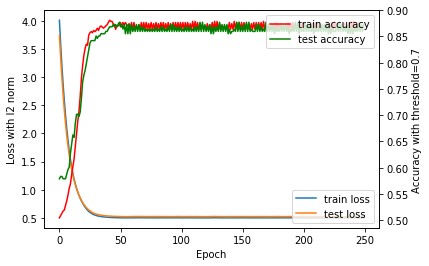

Figure of {'C': 2, 'eta': 0.1, 'lamda': 0.1, 'threshold': 0.4}


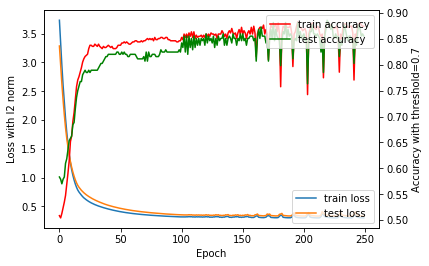

Figure of {'C': 1, 'eta': 0.1, 'lamda': 0.1, 'threshold': 0.4}


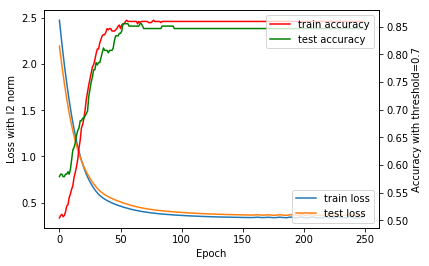

Figure of {'C': 1, 'eta': 0.02, 'lamda': 0.5, 'threshold': 0.4}


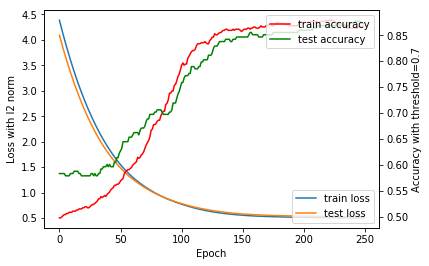

Figure of {'C': 1, 'eta': 0.05, 'lamda': 0.1, 'threshold': 0.4}


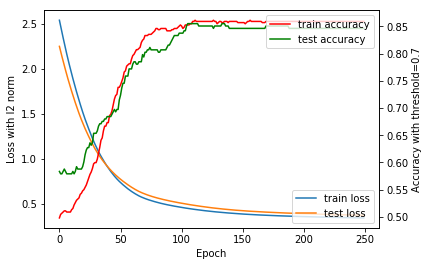

In [6]:
# -*- coding: utf-8 -*-

import numpy as np 
import scipy  
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split,GridSearchCV

import LinearClassifier

data = load_svmlight_file("./resources/australian_scale.txt")
result_path = './results/classification_grid_search.csv'
# add interception
X = scipy.sparse.hstack(\
    (scipy.sparse.csr_matrix(np.ones((len(data[1]),1))),data[0]))
Y = data[1].reshape((len(data[1]),1))

num_records,num_features  = np.shape(X) 

X_train, X_test, Y_train, Y_test = train_test_split(\
X, Y, test_size=0.33,random_state=42)
Y_train = Y_train.reshape((len(Y_train),1))
Y_test = Y_test.reshape((len(Y_test),1))

# initialize w
init_w = np.random.normal(size=(num_features,1))

max_iterate = 250

param_grid = [
  {'lamda': [0, 0.1, 0.5], 
   'eta': [0.01, 0.02, 0.05, 0.1],
   'C': [1, 2],
   'threshold': [0.4,0.5,0.6]}
 ]


cls = GridSearchCV(LinearClassifier.LinearClassifier(init_w,max_epoch=max_iterate), param_grid,return_train_score=True)
cls.fit(X_train,Y_train)
result = pd.DataFrame(cls.cv_results_)
result.sort_values('rank_test_score',inplace=True)
result = result.reset_index(drop = True)

print ("Exhaustive Grid Search Result")
print ("The best estimator's parameter is",cls.best_params_)
print (result.loc[:,['rank_test_score','mean_test_score','mean_train_score','mean_fit_time','params']])
result.to_csv(result_path)
print ("Result has been saved in",result_path)

print ("Printing the best 5 models loss curves")
for i in range(5):
    params = result.loc[i,'params']
    print ("Figure of",params)
    classifier = LinearClassifier.LinearClassifier(init_w,max_epoch=max_iterate,**params)
    classifier.fit(X_train,Y_train)
    loss_train = classifier.getLossHistory(X_train,Y_train)
    loss_test = classifier.getLossHistory(X_test,Y_test)
    accuracy_train = classifier.getScoreHistory(X_train,Y_train)
    accuracy_test = classifier.getScoreHistory(X_test,Y_test)
    
    plt.figure(i)
    fig, ax = plt.subplots()
    ax_e = ax.twinx()
    train_loss_line = ax.plot(range(max_iterate),loss_train,label='train loss')
    test_loss_line = ax.plot(range(max_iterate),loss_test,label='test loss')
    train_accuracy_line = ax_e.plot(range(max_iterate),accuracy_train,'r',label='train accuracy')
    test_accuracy_line = ax_e.plot(range(max_iterate),accuracy_test,'g',label='test accuracy')
    
    ax.set(xlabel='Epoch', ylabel='Loss with l2 norm')
    ax_e.set_ylabel('Accuracy with threshold='+str(params['threshold']))
    
    ax.legend(loc=4)
    ax_e.legend(loc=1)
    plt.show()



